In [1]:
### table of predictors
# load predictors
import importlib.util
from re import M
spec_config = importlib.util.spec_from_file_location("config_module", "5_config.py")
config_module = importlib.util.module_from_spec(spec_config)
spec_config.loader.exec_module(config_module)
MAOC_config = config_module.MAOC_config
MIC_config = config_module.MIC_config
BD_config = config_module.BD_config
dOC_config = config_module.dOC_config
dMAOC_config = config_module.dMAOC_config
dMIC_config = config_module.dMIC_config
pred_config_OC_2009 = config_module.pred_config_OC_2009
pred_config_OC_2015 = config_module.pred_config_OC_2015
pred_config_OC_2018 = config_module.pred_config_OC_2018
pred_config_Cmic_2009 = config_module.pred_config_Cmic_2009
pred_config_Cmic_2015 = config_module.pred_config_Cmic_2015
pred_config_Cmic_2018 = config_module.pred_config_Cmic_2018
pred_config_BD_2009 = config_module.pred_config_BD_2009
pred_config_BD_2015 = config_module.pred_config_BD_2015
pred_config_BD_2018 = config_module.pred_config_BD_2018
pred_config_dOC_15_18 = config_module.pred_config_dOC_15_18
pred_config_dOC_sc_g_kg_15_18_median = config_module.pred_config_dOC_sc_g_kg_15_18_median
pred_config_dCmic_15_18_median = config_module.pred_config_dCmic_15_18_median
# load accuracies + uncertainty
import pickle
def r2_stats_by_model(results_df, r2_col="test_R2", model_col="model_type"):
    """Return median/std of R2 for each model type."""
    return (results_df.groupby(model_col, dropna=False)[r2_col]
        .agg(median="median", std="std")
        .reset_index())
bd_2018_stats = r2_stats_by_model(pickle.load(open("5_results/5_BD 0-20_2018_results.pkl", "rb")))
cmic_2018_stats = r2_stats_by_model(pickle.load(open("5_results/5_Cmic_2018_results.pkl", "rb")))
oc_sc_g_kg_2009_stats = r2_stats_by_model(
    pickle.load(open("5_results/5_OC_sc_g_kg_2009_results.pkl", "rb"))
)
dcmic_15_18_median_stats = r2_stats_by_model(pickle.load(open("5_results/5_dCmic_15_18_median_results.pkl", "rb")))
doc_15_18_stats = r2_stats_by_model(pickle.load(open("5_results/5_dOC_15_18_results.pkl", "rb")))
doc_sc_g_kg_15_18_median_stats = r2_stats_by_model(pickle.load(open("5_results/5_dOC_sc_g_kg_15_18_median_results.pkl", "rb")))
# create table
import pandas as pd

def predictors_from_config(cfg):
    predictors = []
    for key in ("normal", "log"):
        predictors.extend(cfg.get("predictors", {}).get(key, []))
    return predictors

train_configs = {
    "MAOC": MAOC_config,
    "MIC": MIC_config,
    "BD": BD_config,
    "dOC": dOC_config,
    "dMAOC": dMAOC_config,
    "dMIC": dMIC_config,
}

pred_configs = {
    "OC_sc_g_kg_2015": pred_config_OC_2015,
    "OC_sc_g_kg_2018": pred_config_OC_2018,
    "Cmic_2015": pred_config_Cmic_2015,
    "Cmic_2018": pred_config_Cmic_2018,
    "BD_2015": pred_config_BD_2015,
    "BD_2018": pred_config_BD_2018,
    "dOC_15_18": pred_config_dOC_15_18,
    "dOC_sc_g_kg_15_18_median": pred_config_dOC_sc_g_kg_15_18_median,
    "dCmic_15_18_median": pred_config_dCmic_15_18_median,
}

stats_by_target = {
    "BD 0-20_2018": bd_2018_stats,
    "Cmic_2018": cmic_2018_stats,
    "OC_sc_g_kg_2009": oc_sc_g_kg_2009_stats,
    "dCmic_15_18_median": dcmic_15_18_median_stats,
    "dOC_15_18": doc_15_18_stats,
    "dOC_sc_g_kg_15_18_median": doc_sc_g_kg_15_18_median_stats,
}

all_configs = {**train_configs, **pred_configs}

target_to_predictors = {
    cfg["target_name"]: set(predictors_from_config(cfg))
    for cfg in all_configs.values()
}

AE_gps2018_2017 = [f"AE{str(i).zfill(2)}_2018gps_2017" for i in range(64)]
AE_gps2018_2018 = [f"AE{str(i).zfill(2)}_2018gps_2018" for i in range(64)]
Bioclim_gps2009 = [f"BIOCLIM_2009gps_{i+1}" for i in range(19)]
Bioclim_gps2015 = [f"BIOCLIM_2015gps_{i+1}" for i in range(19)]
Bioclim_gps2018 = [f"BIOCLIM_2018gps_{i+1}" for i in range(19)]
texture = ["Clay", "Silt", "Sand", "Coarse"]
LUCAS_2009 = [
    f"{var}_2009"
    for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]
]
LUCAS_2015 = [
    f"{var}_2015"
    for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]
]
LUCAS_2018 = [
    f"{var}_2018"
    for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]
]
Ox = ["Ox_Al_2018", "Ox_Fe_2018"]
MNPP_gps2009_2009m2 = [f"MODIS_NPP_2009gps_{y}" for y in range(2009, 2009 - 3, -1)]
MNPP_gps2015_2015m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2015, 2015 - 3, -1)]
MNPP_gps2015_2018m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2018, 2018 - 3, -1)]
MNPP_gps2018_2018m2 = [f"MODIS_NPP_2018gps_{y}" for y in range(2018, 2018 - 3, -1)]

group_definitions = {
    "AE_gps2018_2017": AE_gps2018_2017,
    "AE_gps2018_2018": AE_gps2018_2018,
    "Bioclim_gps2009": Bioclim_gps2009,
    "Bioclim_gps2015": Bioclim_gps2015,
    "Bioclim_gps2018": Bioclim_gps2018,
    "Texture": texture,
    "LUCAS_2009": LUCAS_2009,
    "LUCAS_2015": LUCAS_2015,
    "LUCAS_2018": LUCAS_2018,
    "Ox": Ox,
    "MNPP_gps2009_2009m2": MNPP_gps2009_2009m2,
    "MNPP_gps2015_2015m2": MNPP_gps2015_2015m2,
    "MNPP_gps2015_2018m2": MNPP_gps2015_2018m2,
    "MNPP_gps2018_2018m2": MNPP_gps2018_2018m2,
}

group_columns = list(group_definitions.keys())

model_types = sorted(
    {
        model
        for stats_df in stats_by_target.values()
        for model in stats_df["model_type"].dropna().unique()
    }
)

rows = []
for target_name, stats_df in stats_by_target.items():
    predictors = target_to_predictors.get(target_name, set())
    row = {
        "row_type": "model_accuracy",
        "target_name": target_name,
    }
    for model_type in model_types:
        model_stats = stats_df[stats_df["model_type"] == model_type]
        if not model_stats.empty:
            row[f"{model_type}_r2_median"] = model_stats["median"].iloc[0]
            row[f"{model_type}_r2_std"] = model_stats["std"].iloc[0]
        else:
            row[f"{model_type}_r2_median"] = float("nan")
            row[f"{model_type}_r2_std"] = float("nan")
    row.update(
        {
            group: all(pred in predictors for pred in preds)
            for group, preds in group_definitions.items()
        }
    )
    rows.append(row)

for pred_key, cfg in pred_configs.items():
    predictors = set(predictors_from_config(cfg))
    row = {
        "row_type": "predictor_only",
        "target_name": cfg["target_name"],
    }
    for model_type in model_types:
        row[f"{model_type}_r2_median"] = float("nan")
        row[f"{model_type}_r2_std"] = float("nan")
    row.update(
        {
            group: all(pred in predictors for pred in preds)
            for group, preds in group_definitions.items()
        }
    )
    rows.append(row)

accuracy_cols = []
for model_type in model_types:
    accuracy_cols.extend([f"{model_type}_r2_median", f"{model_type}_r2_std"])

accuracy_predictor_table = pd.DataFrame(
    rows,
    columns=[
        "row_type",
        "target_name",
        *accuracy_cols,
        *group_columns,
    ],
)

row_type_order = ["model_accuracy", "predictor_only"]
accuracy_predictor_table["row_type"] = pd.Categorical(
    accuracy_predictor_table["row_type"],
    categories=row_type_order,
    ordered=True,
)

model_target_order = list(stats_by_target.keys())
base_order = [
    name.rsplit("_", 1)[0] if "_" in name else name
    for name in model_target_order
]

def base_target(name):
    if name.startswith("BD 0-20_"):
        return "BD 0-20"
    if name.startswith("Cmic_"):
        return "Cmic"
    if name.startswith("OC_sc_g_kg_"):
        return "OC_sc_g_kg"
    if name.startswith("dCmic_"):
        return "dCmic"
    if name.startswith("dOC_sc_g_kg_"):
        return "dOC_sc_g_kg"
    if name.startswith("dOC_"):
        return "dOC"
    return name.rsplit("_", 1)[0] if "_" in name else name

base_order = [base_target(name) for name in model_target_order]
base_rank = {base: idx for idx, base in enumerate(base_order)}

accuracy_predictor_table["base_target"] = accuracy_predictor_table[
    "target_name"
].map(base_target)
accuracy_predictor_table["base_rank"] = accuracy_predictor_table[
    "base_target"
].map(base_rank)
accuracy_predictor_table["base_rank"] = accuracy_predictor_table[
    "base_rank"
].fillna(len(base_rank))

accuracy_predictor_table = accuracy_predictor_table.sort_values(
    ["base_rank", "row_type", "target_name"],
    kind="mergesort",
).reset_index(drop=True)

accuracy_predictor_table = accuracy_predictor_table.drop(
    columns=["base_target", "base_rank"]
)

AE_gps2018_2017 = [f"AE{str(i).zfill(2)}_2018gps_2017" for i in range(64)]
AE_gps2018_2018 = [f"AE{str(i).zfill(2)}_2018gps_2018" for i in range(64)]
Bioclim_gps2009 = [f"BIOCLIM_2009gps_{i+1}" for i in range(19)]
Bioclim_gps2015 = [f"BIOCLIM_2015gps_{i+1}" for i in range(19)]
Bioclim_gps2018 = [f"BIOCLIM_2018gps_{i+1}" for i in range(19)]
texture = ["Clay", "Silt", "Sand", "Coarse"]
LUCAS_2009 = [f"{var}_2009" for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]]
LUCAS_2015 = [f"{var}_2015" for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]]
LUCAS_2018 = [f"{var}_2018" for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]]
Ox = ["Ox_Al_2018", "Ox_Fe_2018"]
MNPP_gps2009_2009m2 = [f"MODIS_NPP_2009gps_{y}" for y in range(2009, 2009-3, -1)]
MNPP_gps2015_2015m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2015, 2015-3, -1)]
MNPP_gps2015_2018m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2018, 2018-3, -1)]
MNPP_gps2018_2018m2 = [f"MODIS_NPP_2018gps_{y}" for y in range(2018, 2018-3, -1)]

# create tex

import pandas as pd


def _latex_escape(text):
    return (
        str(text)
        .replace("\\", "\\textbackslash{}")
        .replace("_", "\\_")
        .replace("%", "\\%")
        .replace("&", "\\&")
        .replace("#", "\\#")
    )


def _format_value(value):
    if pd.isna(value):
        return ""
    if isinstance(value, bool):
        return "1" if value else "0"
    if isinstance(value, (int, float)):
        return f"{value:.2f}" if isinstance(value, float) else str(value)
    return _latex_escape(value)


def _model_label(model_type):
    normalized = model_type.replace("_", " ")
    replacements = {
        "Piecewise Linear Reg": "Piecewise Linear",
        "Piecewise Linear": "Piecewise Linear",
        "DecisionTree": "DecisionTree",
        "LinReg": "LinReg",
    }
    label = replacements.get(normalized, normalized)
    return _latex_escape(label)



def _group_label(group_name):
    words = group_name.replace("_", " ").split()
    stacked = r"\\".join(_latex_escape(word) for word in words)
    return f"\\shortstack{{{stacked}}}"


def generate_accuracy_predictor_table(df, model_types, group_columns):
    accuracy_cols = []
    for model_type in model_types:
        accuracy_cols.extend([f"{model_type}_r2_median", f"{model_type}_r2_std"])

    accuracy_count = len(accuracy_cols)
    predictor_count = len(group_columns)
    col_def = "l|" + "|".join(["cc"] * len(model_types)) + "|" + ("c" * predictor_count)

    lines = []
    lines.append("{\\renewcommand{\\arraystretch}{1.35}")
    lines.append(f"\\begin{{tabular}}{{{col_def}}}")
    lines.append("\\hline")
    lines.append("\\multirow{3}{*}{Predicted} ")
    lines.append(f"& \\multicolumn{{{accuracy_count}}}{{c|}}{{Accuracy}}")
    lines.append(
        f"& \\multicolumn{{{predictor_count}}}{{c}}{{Predictors}} " + "\\\\"
    )
    lines.append(f"\\cline{{2-{1 + accuracy_count + predictor_count}}}")
    lines.append("")

    header_line = " & " + "\n& ".join(
        [f"\\multicolumn{{2}}{{c|}}{{{_model_label(model_type)}}}" for model_type in model_types]
        + [f"\\multirow{{2}}{{*}}{{{_group_label(group)}}}" for group in group_columns]
    )
    lines.append(header_line + " " + "\\\\")
    lines.append(f"\\cline{{2-{1 + accuracy_count}}}")
    lines.append("")

    metric_lines = []
    for _ in model_types:
        metric_lines.append("$\\widetilde{R^{2}}$ & $\\sigma(R^{2})$")
    blank_predictors = " & ".join([""] * predictor_count)
    if blank_predictors:
        metric_lines.append(blank_predictors)
    metrics_line = " & " + "\n& ".join(metric_lines)
    lines.append(metrics_line + " " + "\\\\")
    lines.append("\\hline")
    lines.append("")

    for idx, (_, row) in enumerate(df.iterrows()):
        if idx % 2 == 1:
            lines.append("\\rowcolor{gray!15}")
        row_cells = [_latex_escape(row["target_name"])]
        for col in accuracy_cols:
            row_cells.append(_format_value(row[col]))
        for col in group_columns:
            row_cells.append(_format_value(row[col]))
        lines.append(" & ".join(row_cells) + " " + "\\\\")
        lines.append("")

    lines.append("\\hline")
    lines.append("\\end{tabular}")
    lines.append("}")
    return "\n".join(lines) + "\n"


latex_code = generate_accuracy_predictor_table(
    accuracy_predictor_table,
    model_types,
    group_columns,
)
with open("figures/accuracy_predictor_table.tex", "w") as f:
    f.write(latex_code)

accuracy_predictor_table

/tmp/ipykernel_1289479/1044214519.py:33: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  bd_2018_stats = r2_stats_by_model(pickle.load(open("5_results/5_BD 0-20_2018_results.pkl", "rb")))
/Net/Groups/BGI/people/leorossd/mamba_envs/envs/hybrid-lucas/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refe

,row_type,target_name,DecisionTree_r2_median,DecisionTree_r2_std,LinReg_r2_median,LinReg_r2_std,Piecewise_Linear_Reg_r2_median,Piecewise_Linear_Reg_r2_std,AE_gps2018_2017,AE_gps2018_2018,...,Bioclim_gps2018,Texture,LUCAS_2009,LUCAS_2015,LUCAS_2018,Ox,MNPP_gps2009_2009m2,MNPP_gps2015_2015m2,MNPP_gps2015_2018m2,MNPP_gps2018_2018m2
0,model_accuracy,BD 0-20_2018,0.355008,0.051096,0.387767,0.022584,0.427899,0.019202,True,True,...,True,True,False,False,True,True,False,False,False,True
1,predictor_only,BD 0-20_2015,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,False,True,False,True,False,True,False,True,False,False
2,predictor_only,BD 0-20_2018,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,True,True,False,False,True,True,False,False,False,True
3,model_accuracy,Cmic_2018,0.239987,0.264704,0.406759,0.029002,0.439865,0.051497,True,True,...,True,True,False,False,True,True,False,False,False,True
4,predictor_only,Cmic_2015,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,False,True,False,True,False,True,False,True,False,False
5,predictor_only,Cmic_2018,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,True,True,False,False,True,True,False,False,False,True
6,model_accuracy,OC_sc_g_kg_2009,0.809756,0.086449,0.435036,0.162565,0.849740,0.213213,True,True,...,False,True,True,False,False,True,True,False,False,False
7,predictor_only,OC_sc_g_kg_2015,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,False,True,False,True,False,True,False,True,False,False
8,predictor_only,OC_sc_g_kg_2018,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,True,True,False,False,True,True,False,False,False,True
9,model_accuracy,dCmic_15_18_median,-0.147587,0.078862,0.058601,0.019122,0.042586,0.024206,True,True,...,False,True,False,True,False,True,False,False,True,False


In [2]:
# table of sensitivities

import pandas as pd


def _latex_escape(text):
    return (
        str(text)
        .replace("\\", "\\textbackslash{}")
        .replace("_", "\\_")
        .replace("%", "\\%")
        .replace("&", "\\&")
        .replace("#", "\\#")
    )


def _format_value(value):
    if pd.isna(value):
        return ""
    if isinstance(value, bool):
        return "1" if value else "0"
    if isinstance(value, (int, float)):
        return f"{value:.3f}" if isinstance(value, float) else str(value)
    return _latex_escape(value)


def generate_sensitivities_table(df):
    col_def = "|".join(["l"] + ["c"] * len(df.columns))
    latex = "{\\renewcommand{\\arraystretch}{1.35}\n"
    latex += f"\\begin{{tabular}}{{{col_def}}}\n"
    latex += "\\hline\n"

    header = " & ".join(_latex_escape(col) for col in df.columns)
    latex += f"{header} \\\\\n"
    latex += "\\hline\n"

    for idx, (_, row) in enumerate(df.iterrows()):
        if idx % 2 == 1:
            latex += "\\rowcolor{gray!15}\n"
        cells = [_format_value(val) for val in row]
        latex += " & ".join(cells) + " \\\\\n"

    latex += "\\hline\n"
    latex += "\\end{tabular}\n"
    latex += "}\n"
    return latex


sensitivities = pd.read_csv("sensitivities.csv")

sensitivities = sensitivities.sort_values(
    ["md", "mt", "sat"],
    kind="mergesort",
).reset_index(drop=True)

sensitivities_latex = generate_sensitivities_table(sensitivities)
with open("figures/sensitivities_table.tex", "w") as f:
    f.write(sensitivities_latex)

sensitivities

,md,mt,sat,temp,I,CUE,beta,tmb,Cg0b,Cg0m,qx,Vmax_p,Vmax_m,Km_p,Km_m,kp,kb,km
0,MM,density_dependent,Langmuir,dynamic,-0.013562,-0.208043,-0.093334,0.000000,0.0,-0.004486,0.0,0.035299,0.100179,-0.034648,-0.099569,0.000000,-0.038312,0.000000
1,MM,density_dependent,Langmuir,steady,0.163063,-0.176078,-0.080623,0.000000,0.0,0.520397,0.0,-0.235137,0.000000,0.233518,0.000000,0.000000,0.107645,0.000000
2,MM,density_dependent,no,dynamic,-0.013129,-0.206143,-0.096799,-0.014102,0.0,0.000000,0.0,0.040003,0.082677,-0.039030,-0.082408,0.000000,-0.030558,0.000000
3,MM,density_dependent,no,steady,0.399999,-0.177738,-0.441907,0.278055,0.0,0.000000,0.0,-0.434329,-0.299626,0.432728,0.299464,0.000000,0.537142,0.000000
4,MM,linear,Langmuir,dynamic,-0.011979,-0.248585,0.000000,0.000000,0.0,-0.002144,0.0,0.022430,0.065864,-0.020448,-0.065676,0.000000,0.065167,0.000000
5,MM,linear,Langmuir,steady,0.055585,-0.198304,0.000000,0.000000,0.0,0.033791,0.0,-0.222714,-0.448544,0.221856,0.447058,0.000000,0.760039,0.000000
6,MM,linear,no,dynamic,-0.011924,-0.252739,0.000000,-0.011996,0.0,0.000000,0.0,0.026167,0.037557,-0.025479,-0.037321,0.000000,0.071914,0.000000
7,MM,linear,no,steady,0.040867,-0.399422,0.000000,0.257389,0.0,0.000000,0.0,-0.451562,-0.309296,0.450229,0.308803,0.000000,0.921621,0.000000
8,RMM,density_dependent,Langmuir,dynamic,-0.013064,-0.186759,-0.091352,0.000000,0.0,-0.004357,0.0,0.036727,0.087354,-0.036417,-0.086920,0.000000,-0.036660,0.000000
9,RMM,density_dependent,Langmuir,steady,0.163053,-0.175016,-0.081147,0.000000,0.0,0.520538,0.0,-0.232530,0.000000,0.232458,0.000000,0.000000,0.106185,0.000000


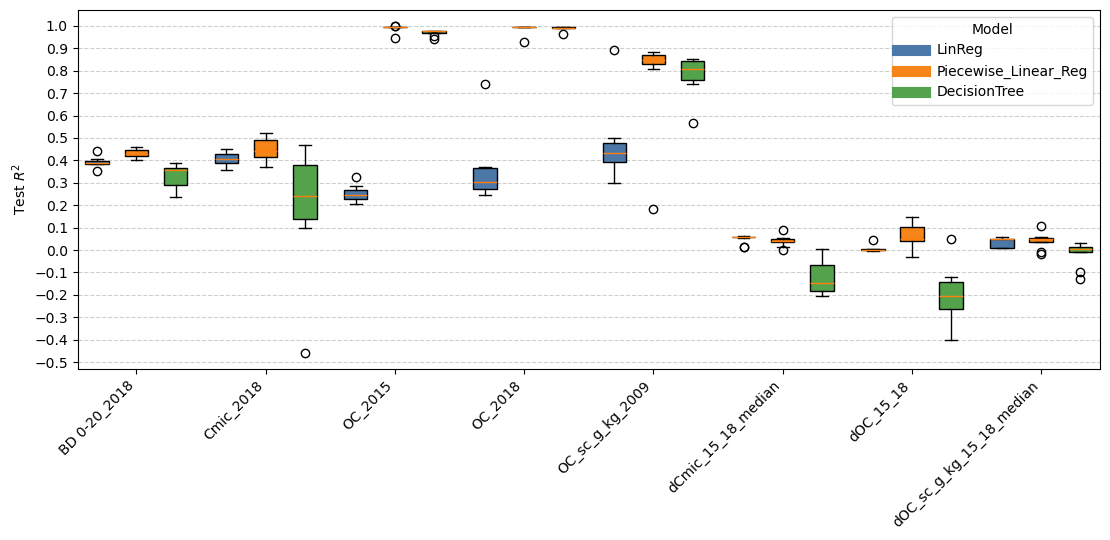

In [3]:
# boxplot of predictions
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

pkl_files = sorted(glob.glob("5_results/5_*_results.pkl"))
models = ["LinReg", "Piecewise_Linear_Reg", "DecisionTree"]

box_data = []
positions = []
labels = []

group_gap = 0.3
for i, file_path in enumerate(pkl_files):
    df = pd.read_pickle(file_path)
    base_name = os.path.basename(file_path)
    cleaned = base_name
    if cleaned.startswith("5_"):
        cleaned = cleaned[2:]
    if cleaned.endswith("_results.pkl"):
        cleaned = cleaned[:-12]
    labels.append(cleaned)
    for j, model in enumerate(models):
        values = df.loc[df["model_type"] == model, "test_R2"].dropna()
        box_data.append(values)
        positions.append(i * (len(models) + group_gap) + j)

fig, ax = plt.subplots(figsize=(max(6, len(pkl_files) * 1.4), 5.5))
box = ax.boxplot(
    box_data,
    positions=positions,
    widths=0.6,
    patch_artist=True,
)

colors = ["#4C78A8", "#F58518", "#54A24B"]
for patch, color in zip(box["boxes"], colors * len(pkl_files)):
    patch.set_facecolor(color)

centers = [i * (len(models) + group_gap) + (len(models) - 1) / 2 for i in range(len(pkl_files))]
ax.set_xticks(centers)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel("Test $R^2$")

legend_handles = [
    plt.Line2D([0], [0], color=color, lw=8) for color in colors
]
ax.legend(
    legend_handles,
    models,
    title="Model",
    loc="upper right",
)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis="y", which="major", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("figures/boxplot_models_by_pkl.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
# check hybrid
results_path = "6_hybrid_outputs_old"
import os
import re
from collections import Counter

slurm_files = [f for f in os.listdir(results_path) if f.startswith("slurm") and f.endswith(".out")]

# Count failed runs (runs with any NaN metric line) by version/temp combo.
failed_by_combo = Counter()
seen_runs_by_combo = Counter()

nan_token = re.compile(r"(?<![A-Za-z0-9_])-?nan(?![A-Za-z0-9_])", re.IGNORECASE)

for slurm_file in slurm_files:
    with open(os.path.join(results_path, slurm_file), "r") as f:
        current_combo = None
        run_has_nan = False
        run_started = False

        for raw_line in f:
            line = raw_line.strip()

            if line.startswith("Combo:"):
                # Example: Combo: 2015_2018:6:RMM:density_dependent:Langmuir:Cp,Cm
                parts = line.replace("Combo:", "", 1).strip().split(":")
                if len(parts) >= 5:
                    temp = parts[0]
                    md, mt, sat = parts[2], parts[3], parts[4]
                    version = f"{md}+{mt}+{sat}"
                    current_combo = f"{version}|{temp}"
                else:
                    current_combo = line.replace("Combo:", "", 1).strip()

                # Reset state whenever the combo header changes.
                run_has_nan = False
                run_started = False

            elif line.startswith("init y_loss"):
                # Start of a new run within the current combo.
                run_has_nan = False
                run_started = True

            elif line.startswith("step"):
                if run_started and nan_token.search(line):
                    run_has_nan = True

            elif line.startswith("total_time_sec"):
                # Count only completed runs.
                if current_combo is not None and run_started:
                    seen_runs_by_combo[current_combo] += 1
                    if run_has_nan:
                        failed_by_combo[current_combo] += 1
                run_has_nan = False
                run_started = False

if not seen_runs_by_combo:
    print("No runs found.")
else:
    # Re-group as temp -> version and print all 12 md+mt+sat versions per temp.
    all_versions = [
        f"{md}+{mt}+{sat}"
        for md in ["linear", "MM", "RMM"]
        for mt in ["linear", "density_dependent"]
        for sat in ["no", "Langmuir"]
    ]

    grouped = {}
    for combo, total in seen_runs_by_combo.items():
        version, temp = combo.split("|", 1)
        failed = failed_by_combo.get(combo, 0)
        grouped.setdefault(temp, {})[version] = (failed, total)

    temp_order = ["2015", "2018", "2015_2018"]
    print("failed/total\ttemp\tversion")
    for temp in temp_order:
        if temp not in grouped:
            continue
        for version in all_versions:
            failed, total = grouped[temp].get(version, (0, 0))
            print(f"{failed}/{total}\t{temp}\t{version}")

failed/total	temp	version
0/200	2015	linear+linear+no
0/200	2015	linear+linear+Langmuir
0/240	2015	linear+density_dependent+no
0/240	2015	linear+density_dependent+Langmuir
0/280	2015	MM+linear+no
10/280	2015	MM+linear+Langmuir
0/320	2015	MM+density_dependent+no
0/240	2015	MM+density_dependent+Langmuir
0/280	2015	RMM+linear+no
0/200	2015	RMM+linear+Langmuir
0/320	2015	RMM+density_dependent+no
0/240	2015	RMM+density_dependent+Langmuir
0/200	2018	linear+linear+no
0/200	2018	linear+linear+Langmuir
0/240	2018	linear+density_dependent+no
0/240	2018	linear+density_dependent+Langmuir
0/280	2018	MM+linear+no
10/280	2018	MM+linear+Langmuir
0/320	2018	MM+density_dependent+no
0/240	2018	MM+density_dependent+Langmuir
0/280	2018	RMM+linear+no
0/200	2018	RMM+linear+Langmuir
0/320	2018	RMM+density_dependent+no
0/240	2018	RMM+density_dependent+Langmuir
0/200	2015_2018	linear+linear+no
0/200	2015_2018	linear+linear+Langmuir
0/240	2015_2018	linear+density_dependent+no
0/240	2015_2018	linear+density_depen

In [ ]:
# adaptability
from doctest import ELLIPSIS_MARKER
from matplotlib.lines import Line2D

lucas = pd.read_pickle("5_with_predictions.pkl")
split = lucas['split']

# numpy pickle-compat shim: some pickles reference numpy._core.*
import sys
import numpy.core.numeric as _np_core_numeric
sys.modules.setdefault("numpy._core.numeric", _np_core_numeric)

def r2_like_training(y_target, y_pred_compare):
    y_target = np.asarray(y_target)
    y_pred_compare = np.asarray(y_pred_compare)
    ss_res = np.sum((y_target - y_pred_compare) ** 2, axis=0)
    ss_tot = np.sum((y_target - np.mean(y_target, axis=0)) ** 2, axis=0)
    return 1.0 - ss_res / (ss_tot + 1e-12)


def n_globals_from_filename(file_name):
    globals_part = file_name.rsplit("_globals", 1)[-1].removesuffix(".pkl")
    if globals_part == "none":
        return 0
    return len(globals_part.split("-"))


def fold_valid_indices(data, fold):
    fold_idx = split[split == fold].index
    return fold_idx.intersection(data.index)
versions = {}
for md in ["linear", "MM", "RMM"]:
    for mt in ["linear", "density_dependent"]:
        for sat in ["no", "Langmuir"]:
            file_sub_str = f"md{md}_mt{mt}_sat{sat}"

            # colors by md
            color_map = {
                "linear": "black",   # linear md -> black
                "MM": "violet",      # MM -> violet
                "RMM": "red",        # RMM -> red
            }

            # line width by mt
            linewidth = 1 if mt == "linear" else 3  # linear mt thin, density_dependent thick

            # line style by saturation
            linestyle = ":" if sat == "no" else "-"  # no saturation dotted, Langmuir continuous

            versions[file_sub_str] = {
                "color": color_map[md],
                "texture": linestyle,          # reuse existing 'texture' field for linestyle
                "linewidth": linewidth,
                "legend": f"{md}-{mt}-{sat}",
            }

all_files = os.listdir(results_path)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for row_i, temp in enumerate(["2015", "2018", "2015_2018"]): # temp
    for col_i, targets in enumerate(["Cp", "Cp-Cb", "Cp-Cm", "Cp-Cb-Cm"]): # targets
        ax = axes[row_i, col_i]
        for version in versions:
            arr = np.full((10, 3, 20), np.nan)
            for fold in range(10): # loop over folds
                files = [f for f in all_files
                    if version in f
                    and f"fold{fold}" in f
                    and f"{targets}_" in f
                    and f"temp{temp}_fold" in f]
                files = sorted(files, key=len, reverse=True)
                for f, file in enumerate(files): # loop over existing files (spatially varying parameters)
                    data = pd.read_pickle(os.path.join(results_path, file)) # load pkl
                    valid = fold_valid_indices(data, fold) # match validation fold to exactly saved samples
                    data = data.loc[valid]
                    target_names = targets.split('-')
                    y = data[[f"target_{tar}" for tar in target_names]].to_numpy()
                    y_p = data[[f"pred_{tar}" for tar in target_names]].to_numpy()
                    r2_vec = r2_like_training(y, y_p)
                    arr[fold, :len(target_names), f] = r2_vec
            if np.isnan(arr).all():
                print('all nan:', temp, targets, version)
            arr_nonan = arr[:, :, ~np.all(np.isnan(arr), axis=(0,1))]  # remove spatial parameters which are not there
            arr_nonan = arr_nonan[:, ~np.all(np.isnan(arr_nonan), axis=(0, 2)), :]  # keep only existing targets
            med = np.median(arr_nonan, axis=0) # median along folds
            mean = np.mean(med, axis=0)  # remove a dim after mean along folds
            # print([f"{x:.2f}" for x in mean])
            style = versions[version]
            ax.plot(np.arange(len(mean)), mean, # data
                label=version,
                color=style["color"],linestyle=style["texture"],linewidth=style["linewidth"])

temps = ["2015", "2018", "2015_2018"]
targets_list = ["Cp", "Cp-Cb", "Cp-Cm", "Cp-Cb-Cm"]

x_max = max((len(line.get_xdata()) for ax in axes.ravel() for line in ax.get_lines()), default=1) - 1
for r, t in enumerate(temps):
    for c, tar in enumerate(targets_list):
        ax = axes[r, c]
        if r == 0:
            ax.set_title(tar)
        if c == 0 and r in [0,1]:
            ax.set_ylabel(f"R\u0305² of {t} stocks")
        if c == 0 and r in [2]:
            ax.set_ylabel(f"R\u0305² of {t} Δ stocks")
        if r == len(temps) - 1:
            ax.set_xlabel("# spatial parameters")

for row_i, temp in enumerate(["2015", "2018", "2015_2018"]): # temp
    for col_i, targets in enumerate(["Cp", "Cp-Cb", "Cp-Cm", "Cp-Cb-Cm"]): # targets
        ax = axes[row_i, col_i]
        if row_i > 1:
            ax.set_ylim(0, 0.25)
        else:
            ax.set_ylim(0, 1)
        ax.set_xlim(0, x_max)    

# Build one legend entry per version (using stored styles)
legend_elements = []
for version, style in versions.items():
    legend_elements.append(
        Line2D(
            [0], [0],
            color=style["color"],
            linestyle=style["texture"],
            linewidth=style["linewidth"],
            label=style["legend"],   # or label=version
        )
    )

# Single legend next to the parent plot
fig.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.,
    frameon=False)
plt.tight_layout()
plt.savefig('figures/line_adaptability_grid.png', dpi=300)
plt.show()

/tmp/ipykernel_926177/1881199362.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_2 = get_cmap("RdYlGn")  # red → yellow → green
/tmp/ipykernel_926177/1881199362.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.86, 1])


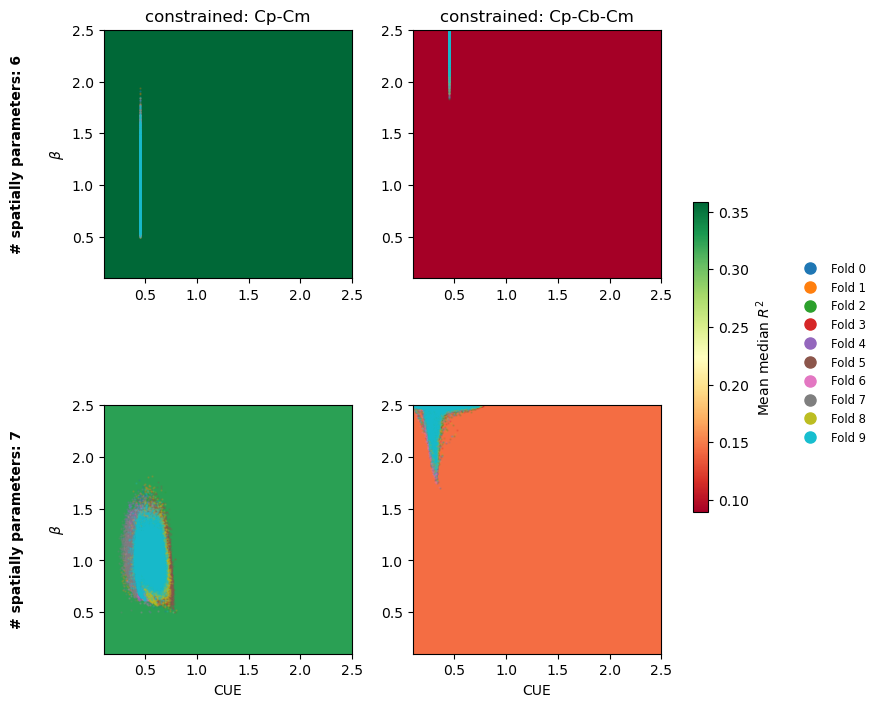

/tmp/ipykernel_926177/1881199362.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_2 = get_cmap("RdYlGn")  # red → yellow → green
/tmp/ipykernel_926177/1881199362.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.86, 1])


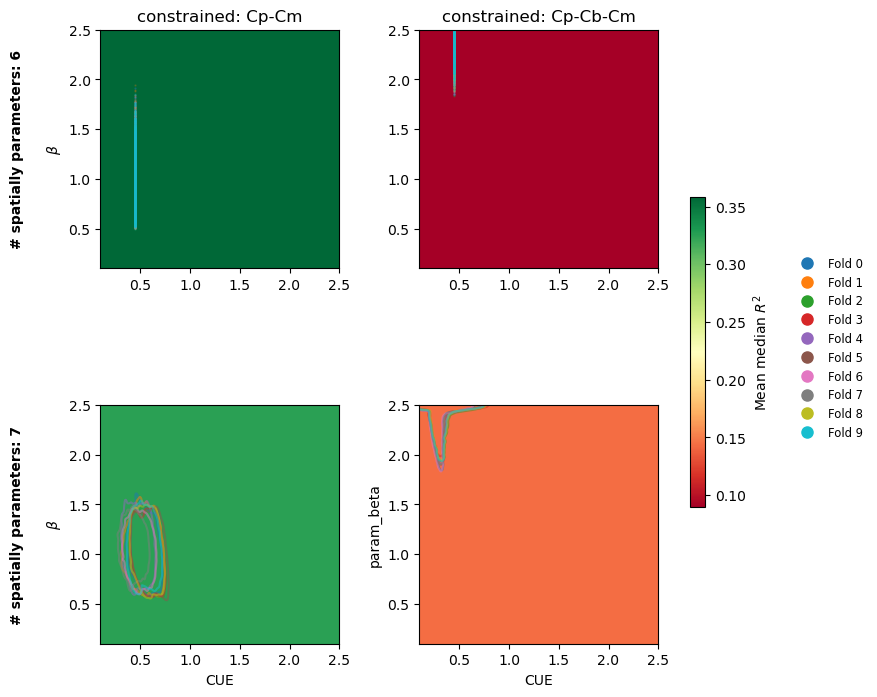

In [ ]:
# scatter plots of equfinality (ß vs. CUE)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
import pandas as pd
import numpy as np
import os

x_var = 'CUE'
y_var = 'beta'
temp = '2015_2018'
target_combis = ['Cp-Cm', 'Cp-Cb-Cm'] 
n = [6, 7]
md = 'RMM'
mt = 'density_dependent'
sat = 'Langmuir'
x_xy = 'xy'

def r2(y, y_p):
    y = np.asarray(y)
    y_p = np.asarray(y_p)
    ss_res = np.sum((y - y_p) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    if ss_tot == 0:
        return np.nan
    return 1 - ss_res / ss_tot

all_files = os.listdir(results_path)

def determination(x_var, y_var, temp, target_combis, n, md, mt, sat, x_xy, filename, shape):
    fig, axes = plt.subplots(nrows=len(n), ncols=len(target_combis), figsize=(4*len(target_combis), 4*len(n)))
    all_x, all_y = [], []
    cmap = plt.cm.tab10
    mean_r2s = []
    for r, n_sp in enumerate(n):
        for c, tar in enumerate(target_combis):
            ax = axes[r, c]
            arr = np.full((10, len(tar.split('-'))), np.nan)
            for fold in range(10):
                files = [
                    f for f in all_files
                    if f"md{md}" in f and f"mt{mt}" in f and f"sat{sat}" in f
                    and f"fold{fold}" in f and f"{tar}_" in f and f"temp{temp}_fold" in f
                ]
                files = sorted(files, key=len, reverse=True)
                data = pd.read_pickle(os.path.join(results_path, files[n_sp]))
                for t_i, t in enumerate(tar.split('-')):
                    y = data[f"target_{t}"]
                    y_p = data[f"pred_{t}"]
                    arr[fold, t_i] = r2(y, y_p)
                if x_xy == "xy":
                    x_vals = data[f"param_{x_var}"]
                    y_vals = data[f"param_{y_var}"]
                    all_x.extend(x_vals)
                    all_y.extend(y_vals)
                    if shape == 'KDE' and len(x_vals.unique()) > 1 and len(y_vals.unique()) > 1:
                        sns.kdeplot(x=x_vals, y=y_vals, levels=[0.01], ax=ax, color=cmap(fold / 10), label=f'Fold {fold}', alpha=0.5)
                    else:
                        ax.scatter(x_vals, y_vals, color=cmap(fold / 10), label=f'Fold {fold}', alpha=0.2, s=0.5)
            med = np.median(arr, axis=0)
            mean = np.mean(med, axis=0)
            mean_r2s.append(mean)

    norm = Normalize(vmin=np.min(mean_r2s), vmax=np.max(mean_r2s))
    cmap_2 = get_cmap("RdYlGn")  # red → yellow → green
    i = 0
    for r, n_sp in enumerate(n): # loop over ax
        for c, tar in enumerate(target_combis):
            ax = axes[r, c]
            ax.set_facecolor(cmap_2(norm(mean_r2s[i])))
            i += 1

    # Create a mappable for the background colormap
    sm = ScalarMappable(norm=norm, cmap=cmap_2)
    sm.set_array([])  # required for matplotlib < 3.7

    # Add colorbar to the right of the subplots
    cbar = fig.colorbar(
        sm,
        ax=axes.ravel().tolist(),
        location='right',
        fraction=0.025,
        pad=0.02
    )
    cbar.set_label('Mean median $R^2$')

    if all_x and all_y:
        lim_lo = min(min(all_x), min(all_y))
        lim_hi = max(max(all_x), max(all_y))
        for ax in axes.ravel():
            ax.set_xlim(lim_lo, lim_hi)
            ax.set_ylim(lim_lo, lim_hi)
            ax.set_aspect('equal')

    for r, n_sp in enumerate(n):
        for c, tar in enumerate(target_combis):
            ax = axes[r, c]
            if r == 0:
                ax.set_title('constrained: ' + tar)
            if c == 0:
                ax.set_ylabel(r'$\beta$')
                ax.text(-0.32, 0.5, f'# spatially parameters: {n_sp}', transform=ax.transAxes, rotation=90, va='center', ha='right', fontweight='bold')
            if r == len(n) - 1:
                ax.set_xlabel(x_var)

    legend_handles = [
        Line2D([0], [0], linestyle='', marker='o', markersize=8, color=cmap(f / 10), alpha=1)
        for f in range(10)
    ]
    fig.legend(legend_handles, [f'Fold {f}' for f in range(10)], loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small', frameon=False)

    plt.tight_layout(rect=[0, 0, 0.86, 1])
    plt.savefig(f'figures/{filename}.png', dpi=300, bbox_inches='tight')
    plt.show()

determination(x_var, y_var, temp, target_combis, n, md, mt, sat, x_xy, 'CUE_beta_scatter_determination.png', 'points')
determination(x_var, y_var, temp, target_combis, n, md, mt, sat, x_xy, 'CUE_beta_scatter_determination.png', 'KDE')

ERROR:2026-02-14 20:19:39,253:jax._src.xla_bridge:487: Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/Net/Groups/BGI/people/leorossd/mamba_envs/envs/hybrid-lucas/lib/python3.11/site-packages/jax/_src/xla_bridge.py", line 485, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/Net/Groups/BGI/people/leorossd/mamba_envs/envs/hybrid-lucas/lib/python3.11/site-packages/jax_plugins/xla_cuda12/__init__.py", line 328, in initialize
    _check_cuda_versions(raise_on_first_error=True)
  File "/Net/Groups/BGI/people/leorossd/mamba_envs/envs/hybrid-lucas/lib/python3.11/site-packages/jax_plugins/xla_cuda12/__init__.py", line 285, in _check_cuda_versions
    local_device_count = cuda_versions.cuda_device_count()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: jaxlib/cuda/versions_helpers.cc:113: operation cuInit(0) failed: Unknown CUDA error 303; cuGetErrorName failed. This p

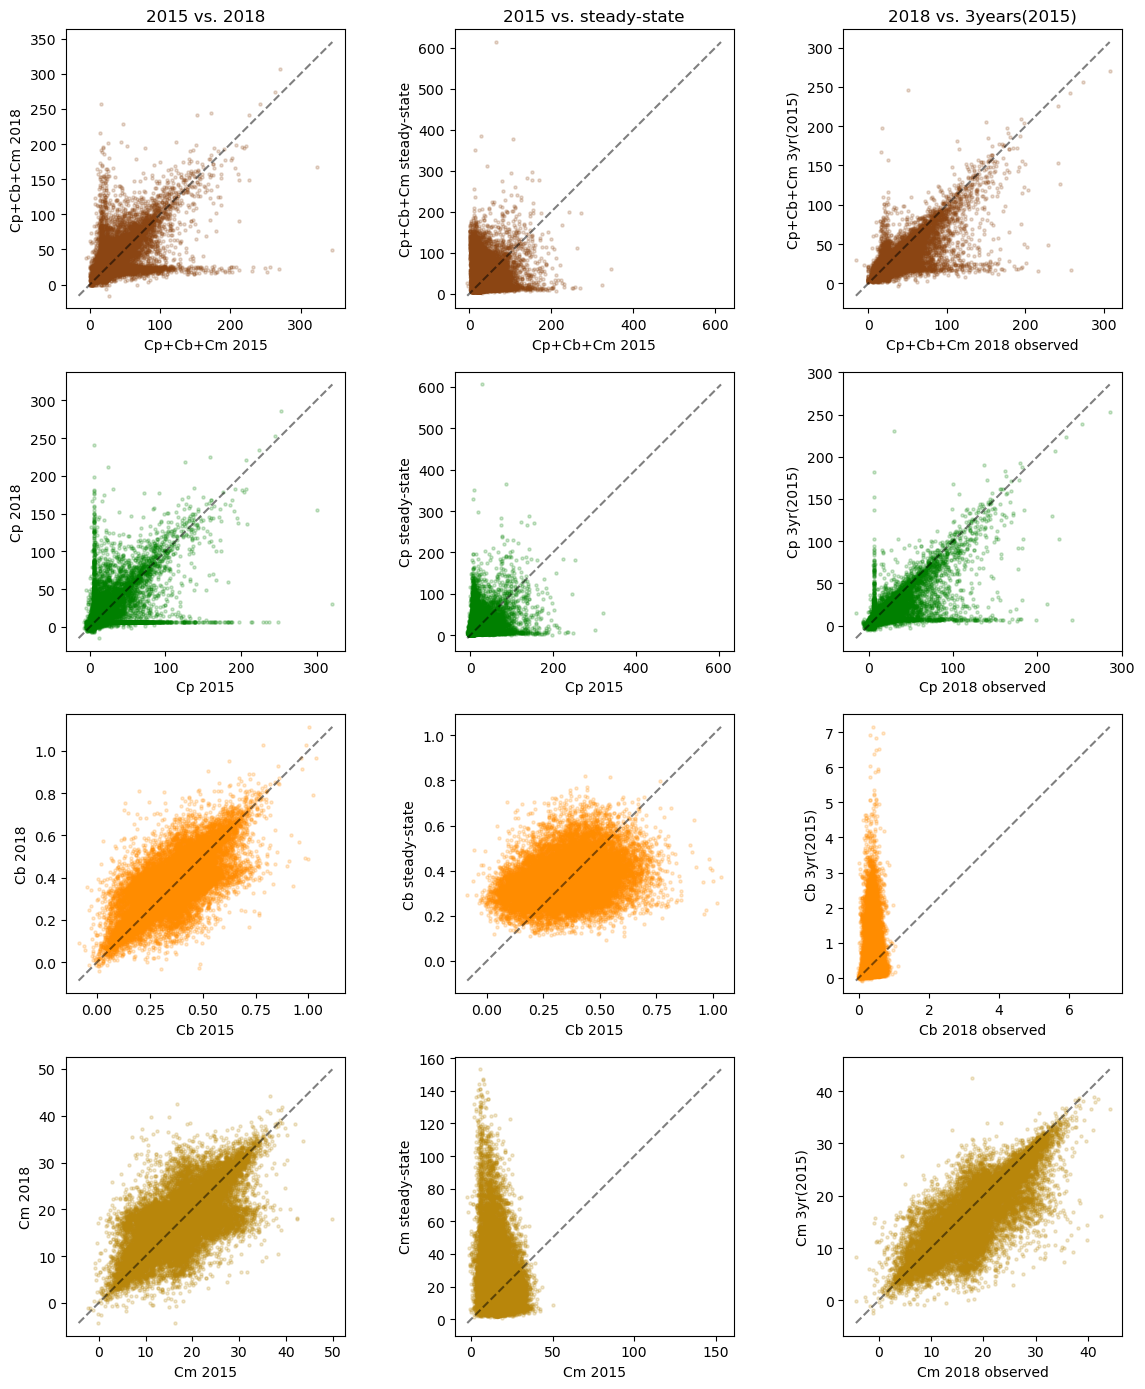

In [ ]:
### SfT plot (RMM-dd-no)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jax.numpy as jnp
import diffrax as dfx
from functools import partial

tar = 'Cp-Cm'
n_sp = 5
md = 'RMM'
mt = 'density_dependent'
sat = 'Langmuir'
fold = 0

from hybrid_models import craig_BA_adapt, analytical_steady_state
from hybrid_utils import vector_field, simulate_final_state

def get(temp, vars):
    all_files = os.listdir(results_path)
    files = [f for f in all_files
            if f"md{md}" in f and f"mt{mt}" in f and f"sat{sat}" in f
            and f"fold{fold}" in f and f"{tar}_" in f and f"temp{temp}_fold" in f]
    files = sorted(files, key=len, reverse=True)
    data = pd.read_pickle(os.path.join(results_path, files[n_sp]))
    return data[vars]

params = get('2015_2018', ['param_I','param_CUE','param_beta','param_tmb','param_Cg0b','param_Cg0m','param_qx','param_Vmax_p','param_Vmax_m','param_Km_p','param_Km_m','param_kp','param_kb','param_km'])
states2015 = get('2015', ['target_Cp','target_Cb','target_Cm'])
states2018 = get('2018', ['target_Cp','target_Cb','target_Cm'])

# align indices across all three (intersection)
common_idx = params.index.intersection(states2015.index).intersection(states2018.index)
params = params.loc[common_idx]
states2015 = states2015.loc[common_idx]
states2018 = states2018.loc[common_idx]

# build param array (n_samples, 14) in order: I, CUE, beta, tmb, Cg0b, Cg0m, qx, Vmax_p, Vmax_m, Km_p, Km_m, kp, kb, km
param_cols = ['param_I','param_CUE','param_beta','param_tmb','param_Cg0b','param_Cg0m','param_qx',
              'param_Vmax_p','param_Vmax_m','param_Km_p','param_Km_m','param_kp','param_kb','param_km']
p_arr = np.asarray(params[param_cols], dtype=np.float32)
y0_2015 = np.asarray(states2015[['target_Cp','target_Cb','target_Cm']], dtype=np.float32)
y_2018 = np.asarray(states2018[['target_Cp','target_Cb','target_Cm']], dtype=np.float32)

# forward runs from 2015 (3 years)
import jax
dt0 = 0.05
t0, t1 = 0.0, 3.0
solver = dfx.Euler()
model_fn = partial(craig_BA_adapt, microbial_decomposition=md, microbial_turnover=mt, carbon_use_efficiency="constant", saturation=sat)
term = dfx.ODETerm(partial(vector_field, model_fn))
batched_sim = jax.vmap(lambda p, y0: simulate_final_state(p, y0, t0, t1, dt0, term, solver))

p_jax = jnp.array(p_arr)
y0_jax = jnp.array(y0_2015)
states_3yr = np.asarray(batched_sim(p_jax, y0_jax))

# analytical steady-state
batched_steady = jax.vmap(partial(analytical_steady_state, microbial_decomposition=md, microbial_turnover=mt, saturation=sat))
states_ss = np.asarray(batched_steady(p_jax))

# sum of three pools + individual pools
tot_2015 = y0_2015.sum(axis=1)
tot_2018 = y_2018.sum(axis=1)
tot_ss = states_ss.sum(axis=1)
tot_3yr = states_3yr.sum(axis=1)

# row: 0=sum, 1=Cp, 2=Cb, 3=Cm
# cols: 0=2015 vs 2018, 1=2015 vs steady-state, 2=2018 vs 3yr(2015)
colors = ['#8B4513', 'green', '#FF8C00', '#B8860B']  # brown, green, bright orange, dark yellow
rows_data = [
    (tot_2015, tot_2018, tot_ss, tot_3yr, 'Cp+Cb+Cm'),
    (y0_2015[:, 0], y_2018[:, 0], states_ss[:, 0], states_3yr[:, 0], 'Cp'),
    (y0_2015[:, 1], y_2018[:, 1], states_ss[:, 1], states_3yr[:, 1], 'Cb'),
    (y0_2015[:, 2], y_2018[:, 2], states_ss[:, 2], states_3yr[:, 2], 'Cm'),
]

fig, axes = plt.subplots(4, 3, figsize=(12, 14))

def add_1to1(ax, x, y):
    low = min(x.min(), y.min())
    high = max(x.max(), y.max())
    ax.plot([low, high], [low, high], 'k--', alpha=0.5)

for row, (x15, y18, ss, y3yr, name) in enumerate(rows_data):
    c = colors[row]
    # 2015 vs 2018
    ax = axes[row, 0]
    ax.scatter(x15, y18, alpha=0.2, s=5, c=c)
    add_1to1(ax, x15, y18)
    ax.set_xlabel(f'{name} 2015')
    ax.set_ylabel(f'{name} 2018')
    if row == 0:
        ax.set_title('2015 vs. 2018')
    ax.set_aspect('equal')

    # 2015 vs steady-state
    ax = axes[row, 1]
    ax.scatter(x15, ss, alpha=0.2, s=5, c=c)
    add_1to1(ax, x15, ss)
    ax.set_xlabel(f'{name} 2015')
    ax.set_ylabel(f'{name} steady-state')
    if row == 0:
        ax.set_title('2015 vs. steady-state')
    ax.set_aspect('equal')

    # 2018 vs 3yr(2015)
    ax = axes[row, 2]
    ax.scatter(y18, y3yr, alpha=0.2, s=5, c=c)
    add_1to1(ax, y18, y3yr)
    ax.set_xlabel(f'{name} 2018 observed')
    ax.set_ylabel(f'{name} 3yr(2015)')
    if row == 0:
        ax.set_title('2018 vs. 3years(2015)')
    ax.set_aspect('equal')

plt.tight_layout()
os.makedirs('figures', exist_ok=True)
plt.savefig('figures/SfT_RMM_dd_Langmuir.png', dpi=150)
plt.show()

(2449,) (2449,)
(2447,) (2447,)
(2450,) (2450,)
(2453,) (2453,)
(2421,) (2421,)
(2433,) (2433,)
(2451,) (2451,)
(2438,) (2438,)
(2449,) (2449,)
(2451,) (2451,)
(2449,) (2449,)
(2447,) (2447,)
(2450,) (2450,)
(2453,) (2453,)
(2421,) (2421,)
(2433,) (2433,)
(2451,) (2451,)
(2438,) (2438,)
(2449,) (2449,)
(2451,) (2451,)
(2449,) (2449,)
(2447,) (2447,)
(2450,) (2450,)
(2453,) (2453,)
(2421,) (2421,)
(2433,) (2433,)
(2451,) (2451,)
(2438,) (2438,)
(2449,) (2449,)
(2451,) (2451,)
(2449,) (2449,)
(2447,) (2447,)
(2450,) (2450,)
(2453,) (2453,)
(2421,) (2421,)
(2433,) (2433,)
(2451,) (2451,)
(2438,) (2438,)
(2449,) (2449,)
(2451,) (2451,)
(2449,) (2449,)
(2447,) (2447,)
(2450,) (2450,)
(2453,) (2453,)
(2421,) (2421,)
(2433,) (2433,)
(2451,) (2451,)
(2438,) (2438,)
(2449,) (2449,)
(2451,) (2451,)
(2449,) (2449,)
(2447,) (2447,)
(2450,) (2450,)
(2453,) (2453,)
(2421,) (2421,)
(2433,) (2433,)
(2451,) (2451,)
(2438,) (2438,)
(2449,) (2449,)
(2451,) (2451,)
(2449,) (2449,)
(2447,) (2447,)
(2450,) 

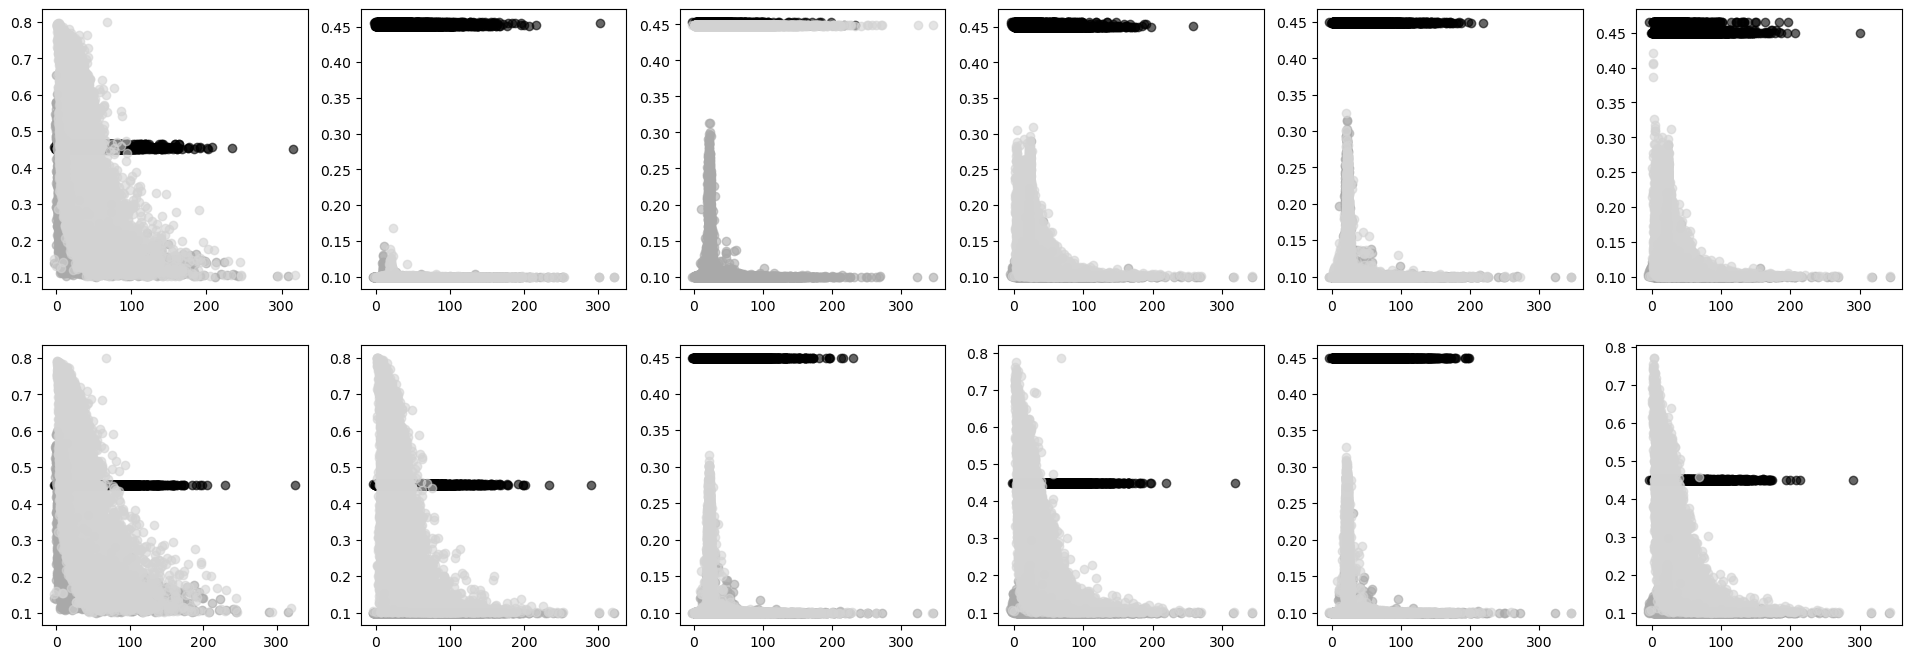

In [ ]:
### CUE vs. SOC
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import os
results_path = "6_hybrid_outputs_old"
import pandas as pd
lucas = pd.read_pickle("5_with_predictions.pkl")
split = lucas['split']
all_files = os.listdir(results_path)
results_path = "6_hybrid_outputs_old"
fig, axes = plt.subplots(2, 6, figsize=(4*6, 4*2)) # 12 plots: versions
def fold_valid_indices(data, fold):
    fold_idx = split[split == fold].index
    return fold_idx.intersection(data.index)
def r2_like_training(y_target, y_pred_compare):
    y_target = np.asarray(y_target)
    y_pred_compare = np.asarray(y_pred_compare)
    ss_res = np.sum((y_target - y_pred_compare) ** 2, axis=0)
    ss_tot = np.sum((y_target - np.mean(y_target, axis=0)) ** 2, axis=0)
    return 1.0 - ss_res / (ss_tot + 1e-12)
def first_max_index(values, tol=0.02):
    # convert to float
    vals = list(map(float, values))
    
    max_val = max(vals)
    threshold = max_val - tol
    
    for i, v in enumerate(vals):
        if v >= threshold:
            return i
target_colors = ['black', 'darkgrey', 'lightgrey']
for i, temp in enumerate(["2015_2018"]): # temp
    for tar_i, targets in enumerate(["Cp", "Cp-Cb", "Cp-Cb-Cm"]): # targets
        for mdi, md in enumerate(["linear", "MM", "RMM"]):
            for mti, mt in enumerate(["linear", "density_dependent"]):
                for s, sat in enumerate(["no", "Langmuir"]):
                    file_sub_str = f"md{md}_mt{mt}_sat{sat}"
                    arr = np.full((10, 3, 20), np.nan)
                    for fold in range(10): # loop over folds
                        files = [f for f in all_files
                            if file_sub_str in f
                            and f"fold{fold}" in f
                            and f"{targets}_" in f
                            and f"temp{temp}_fold" in f]
                        files = sorted(files, key=len, reverse=True)
                        for f, file in enumerate(files): # loop over existing files (spatially varying parameters)
                            data = pd.read_pickle(os.path.join(results_path, file)) # load pkl
                            valid = fold_valid_indices(data, fold) # match validation fold to exactly saved samples
                            data = data.loc[valid]
                            target_names = targets.split('-')
                            y = data[[f"target_{tar}" for tar in target_names]].to_numpy()
                            y_p = data[[f"pred_{tar}" for tar in target_names]].to_numpy()
                            r2_vec = r2_like_training(y, y_p)
                            arr[fold, :len(target_names), f] = r2_vec
                    arr_nonan = arr[:, :, ~np.all(np.isnan(arr), axis=(0,1))]  # remove spatial parameters which are not there
                    arr_nonan = arr_nonan[:, ~np.all(np.isnan(arr_nonan), axis=(0, 2)), :]  # keep only existing targets
                    med = np.median(arr_nonan, axis=0) # median along folds
                    mean = np.mean(med, axis=0)  # remove a dim after mean along folds
                    ax = axes[s, mdi * 2 + mti] # get ax
                    c = target_colors[tar_i] # set tar color
                    first_max_i = first_max_index(mean) # pick lowest n_sp which acchieves good results
                    for fold in range(10): # loop over folds
                        files = [f for f in all_files
                            if file_sub_str in f
                            and f"fold{fold}" in f
                            and f"{targets}_" in f
                            and f"temp{temp}_fold" in f]
                        files = sorted(files, key=len, reverse=True)
                        data = pd.read_pickle(os.path.join(results_path, files[first_max_i])) # load pkl
                        valid = fold_valid_indices(data, fold) # match validation fold to exactly saved samples
                        data = data.loc[valid]
                        Cp_Cb_Cm = data[[f"pred_final_{pool}" for pool in ['Cp', 'Cb', 'Cm']]].to_numpy()
                        SOC = np.sum(Cp_Cb_Cm, axis=1) # get SOC
                        CUE = data["param_CUE"].to_numpy() # get CUE
                        ax.scatter(SOC, CUE, color=c, s=0.5)

# Unify ax limits (identify max and min overall)
all_xlims = [ax.get_xlim() for ax in axes.flat]
all_ylims = [ax.get_ylim() for ax in axes.flat]
x_min = min(l[0] for l in all_xlims)
x_max = max(l[1] for l in all_xlims)
y_min = min(l[0] for l in all_ylims)
y_max = max(l[1] for l in all_ylims)
for ax in axes.flat:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# SOC and CUE as axis labels: x only on lower row, y only on leftmost column
for ax in axes[1, :]:
    ax.set_xlabel("SOC")
for ax in axes[:, 0]:
    ax.set_ylabel("CUE")

# Per-subplot titles (md, mt, sat)
md_names = ["linear", "MM", "RMM"]
mt_names = ["linear", "density_dependent"]
sat_names = ["no", "Langmuir"]
for s in range(2):
    for col in range(6):
        mdi, mti = divmod(col, 2)
        ax = axes[s, col]
        ax.set_title(f"{md_names[mdi]}/{mt_names[mti]}, sat={sat_names[s]}")

# Single legend right of subplots for target combinations
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Cp'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkgrey', markersize=10, label='Cp-Cb'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgrey', markersize=10, label='Cp-Cb-Cm'),
]
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout(rect=[0, 0, 1.0, 1])  # leave space for legend
plt.savefig('figures/SOC_CUE.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
### Qmax vs. Kat vs. Breure
# finde both formulas
# calculate Qmax with both
# 6*3 plots: Langmuir versions *
# Kat vs. Breure, Kat vs. Qmax, Qmax vs. Breure
### table of selected predictors
### table of predictor groups and references